# Week 1 (Import Library, and doing some EDA)

## Import Library and Setup Kagle

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from wordcloud import WordCloud
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')
# Define folder path on Google Drive
folder_path = '/content/drive/MyDrive/Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Define dataset path within the folder
dataset_path = folder_path + 'TMDB_movie_dataset_v11.csv'

# Read the dataset
df = pd.read_csv(dataset_path)
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


## Exploratory Data Analysis (EDA)

In [3]:
# Displays the columns in dataframe
print(df.columns)

# Removing movie that has the "adult" feature TRUE
df = df[df['adult'] != True]

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


In [4]:
# Selecting column(s) that will be use for the model to work and store it to new variable
movies = df[['title', 'overview', 'genres', 'tagline', 'keywords']]
movies.head(3)

,title,overview,genres,tagline,keywords
0,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc..."
1,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,..."
2,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f..."


In [5]:
# Obtaining overview of dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945749 entries, 0 to 1042778
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     945738 non-null  object
 1   overview  772146 non-null  object
 2   genres    636420 non-null  object
 3   tagline   135796 non-null  object
 4   keywords  256052 non-null  object
dtypes: object(5)
memory usage: 43.3+ MB


In [6]:
# Checking numbers of data that have NaN value
missing_values = movies.isna().sum()
print(missing_values)

title           11
overview    173603
genres      309329
tagline     809953
keywords    689697
dtype: int64


In [7]:
# Checking the percentage of missing value a.k.a NaN
missing_percentage = (missing_values / len(movies)) * 100
print("Missing Value Percentage :\n", missing_percentage)

Missing Value Percentage :
 title        0.001163
overview    18.356139
genres      32.707304
tagline     85.641433
keywords    72.926009
dtype: float64


<Figure size 1000x500 with 0 Axes>

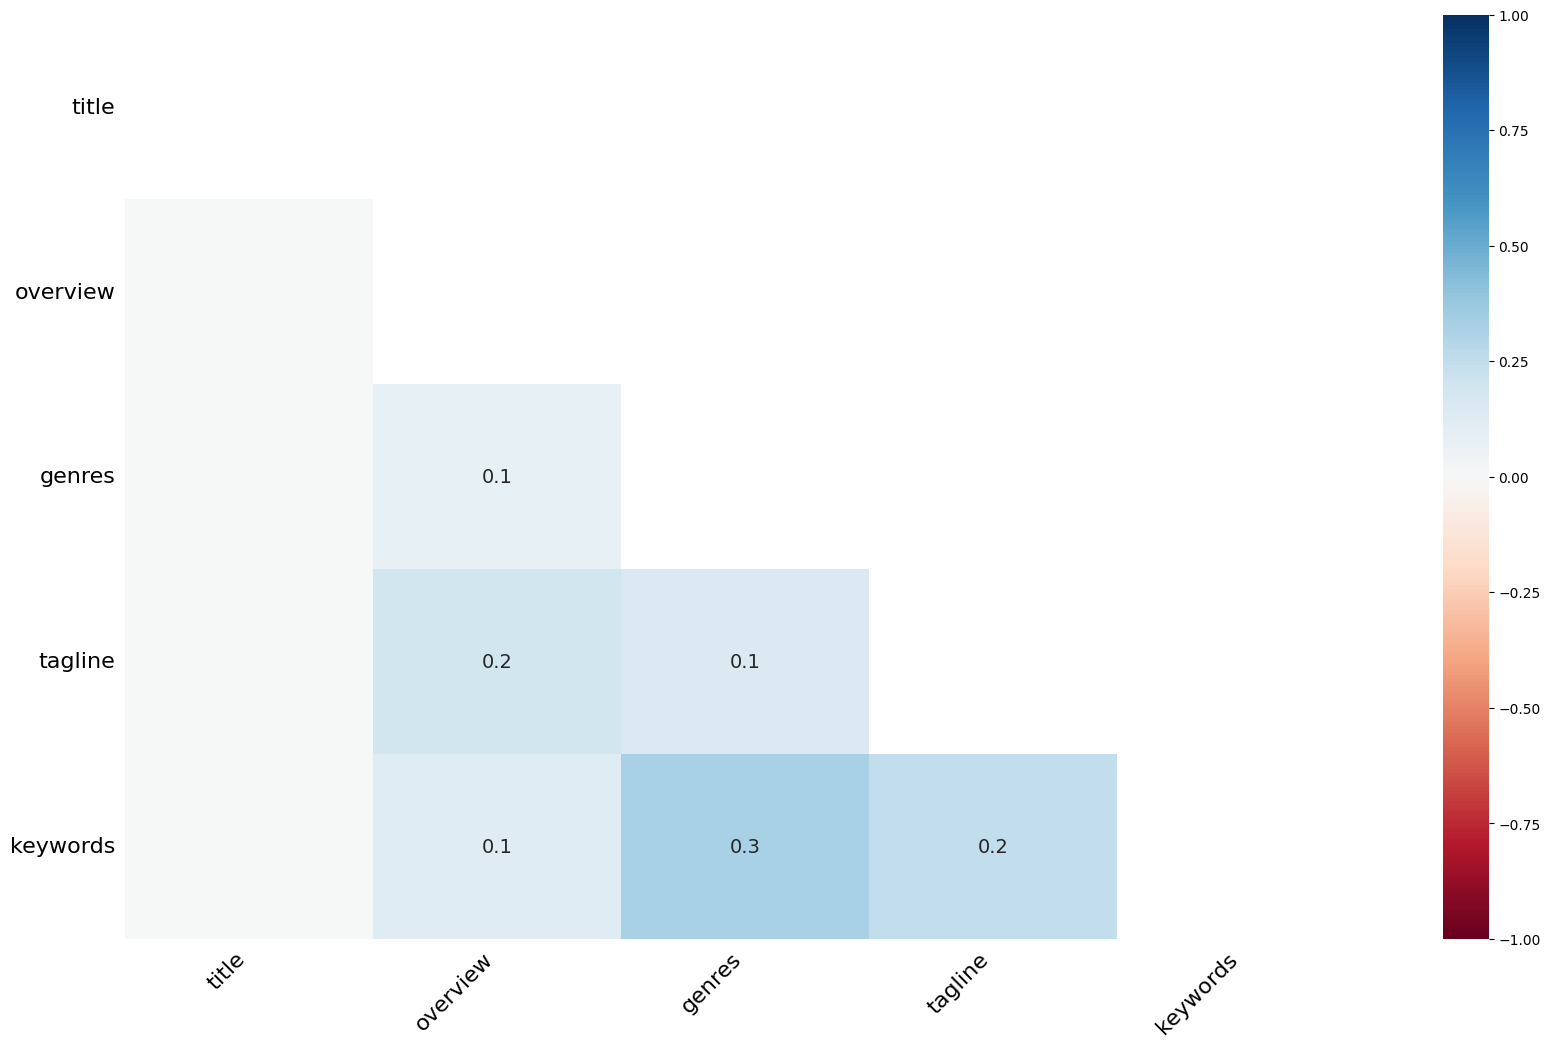

In [8]:
# Visualizing missing values as a heatmap
plt.figure(figsize=(10, 5))
msno.heatmap(movies)
plt.show()

In [9]:
# Checking row(s) that has NaN in it
print(movies[movies.isna().any(axis=1)])

                                                   title  \
107                                        Spirited Away   
110                                           Big Hero 6   
142                                           Black Swan   
183      Birdman or (The Unexpected Virtue of Ignorance)   
225                                       A Star Is Born   
...                                                  ...   
1042774                    Bosko and the Rebirth of Tiki   
1042775                                   Something Love   
1042776                                     Akharin Shab   
1042777                        My Comic Shop DocumentARy   
1042778                                      Dossier 137   

                                                  overview  \
107      A young girl, Chihiro, becomes trapped in a st...   
110      A special bond develops between plus-sized inf...   
142      A journey through the psyche of a young baller...   
183      A fading actor best kn

In [10]:
# Dropping rows where 'genres' is missing
movies = movies.dropna(subset=['genres', 'tagline' ,'overview', 'keywords'])

# Checking if there's still NaN values
movies.isna().sum()

title       0
overview    0
genres      0
tagline     0
keywords    0
dtype: int64

In [11]:
# Splitting the genres by coma and store it in a list
all_genres = [genre.strip() for sublist in movies['genres'].apply(lambda x: x.split(',')) for genre in sublist]

In [12]:
# Counting the frequency of each genre
genre_counts = Counter(all_genres)

# Convert frequency of each genre to a DataFrame, so that it can be used for plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

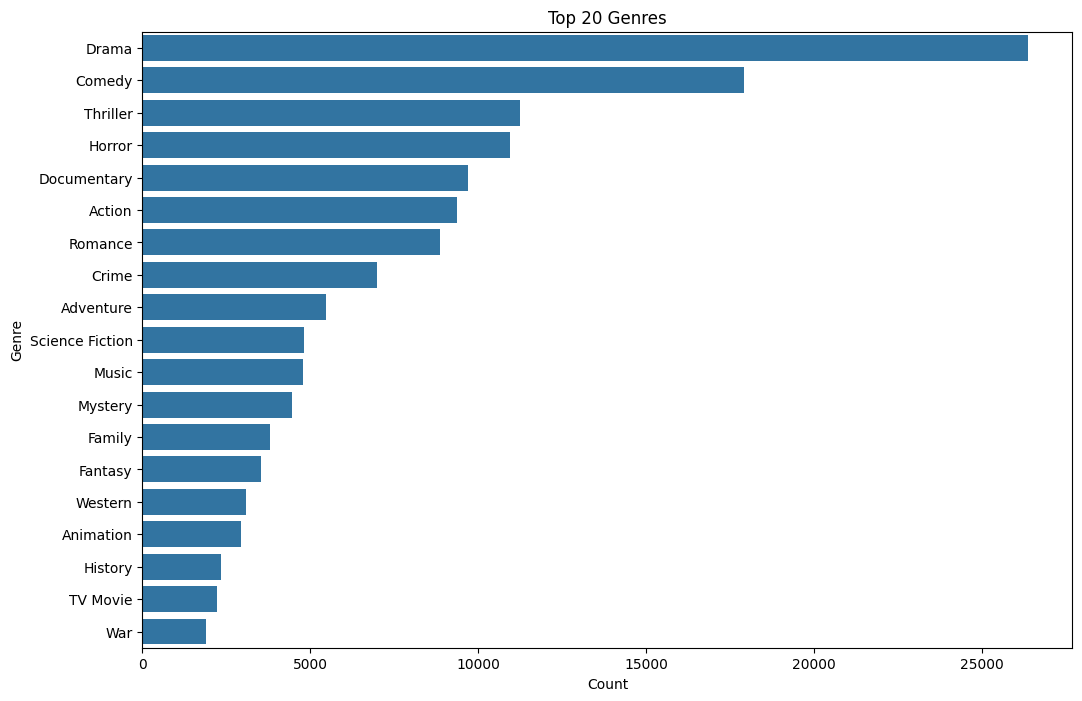

In [13]:
# Plotting the genre distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_df.head(20))
plt.title('Top 20 Genres')
plt.show


overview - Word Count Statistics:
count    70392.000000
mean        48.473704
std         32.145543
min          1.000000
25%         24.000000
50%         40.000000
75%         65.000000
max        194.000000
Name: overview, dtype: float64


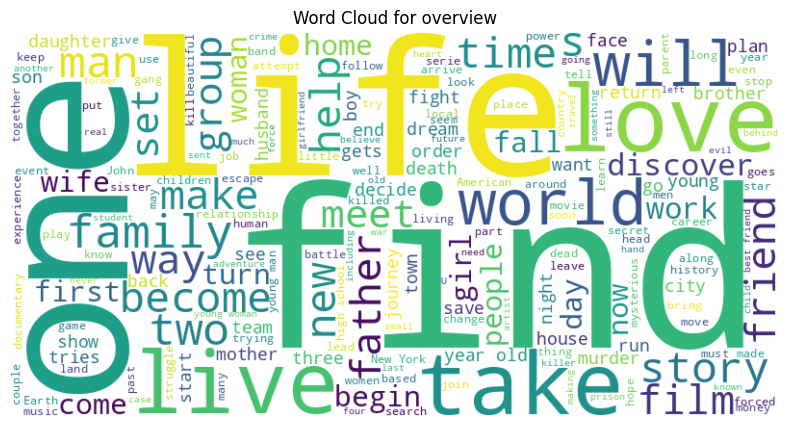


tagline - Word Count Statistics:
count    70392.000000
mean         8.312919
std          5.294893
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         52.000000
Name: tagline, dtype: float64


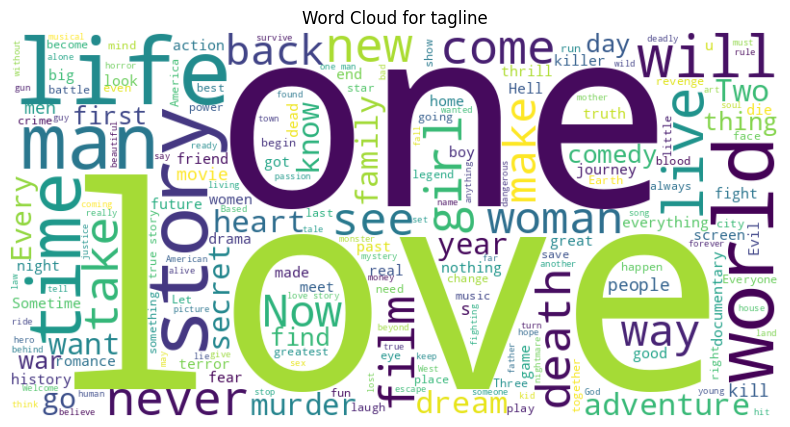


keywords - Word Count Statistics:
count    70392.000000
mean         7.517914
std          7.854167
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max        166.000000
Name: keywords, dtype: float64


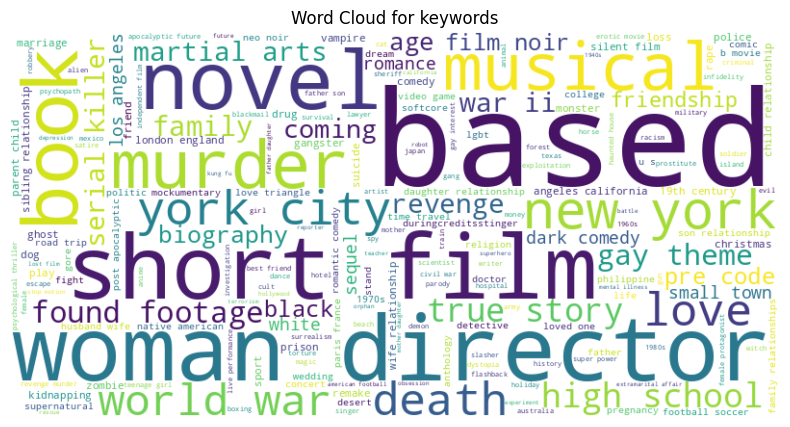

In [14]:
# Analyze Text Data
text_features = ["overview", "tagline", "keywords"]

for feature in text_features:
  word_count = movies[feature].apply(lambda x: len(x.split()))
  print(f"\n{feature} - Word Count Statistics:")
  print(word_count.describe())

  # Generate a Word Cloud for each feature to visualize most common word used
  text = '  '.join(movies[feature].values)
  wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(f"Word Cloud for {feature}")
  plt.axis("off")
  plt.show()

In [15]:
# TF-IDF Analysis

# Sampling the movie to reduce the memory usage
movie_sample = movies.sample(frac=0.1, random_state=42)

for feature in text_features:
  tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
  tfidf_matrix = tfidf.fit_transform(movie_sample[feature])

  # Display top terms in the first few documents
  print(f'\nTop TF-IDF terms for {feature}')
  feature_names = tfidf.get_feature_names_out()
  tfidf_sample = pd.DataFrame(tfidf_matrix[:5].toarray(), columns=feature_names)
  for i in range(5):
    print(tfidf_sample.iloc[i].sort_values(ascending=False).head(10))


Top TF-IDF terms for overview
day            0.232302
explanation    0.230972
dignity        0.224889
jerusalem      0.224889
laborer        0.219919
israel         0.219919
wanting        0.215717
handed         0.212077
denied         0.208866
meat           0.203396
Name: 0, dtype: float64
bookie        0.415276
hometown      0.327459
unable        0.310389
pay           0.302423
ends          0.288631
tragedy       0.288631
plot          0.288631
robbery       0.287715
girlfriend    0.246972
returns       0.246578
Name: 1, dtype: float64
interactions    0.315703
malcolm         0.315703
porter          0.308726
burgeoning      0.302827
tumultuous      0.293210
boundaries      0.293210
drifter         0.273662
strict          0.273662
14              0.244667
explores        0.220612
Name: 2, dtype: float64
grad       0.356498
2008       0.319056
reunite    0.299084
ll         0.268454
kills      0.261073
tragedy    0.260231
coming     0.251212
haunted    0.249218
party      0.2317

# Week 2 (Build Machine Learning model, and then train the model)

## Installing TensorFlow and Importing necesaries libraries for building the model

In [16]:
# Installing TensorFlow
!pip install tensorflow

In [17]:
# Import libraries that will be used for building Machine Learning model
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input, Embedding, LSTM, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Preparing the data for the model

In [26]:
# Prepare the data that will be used for the model
overview_data = movies['overview'].values
genres_data = movies['genres'].values

# Tokenize and add pad to the overview data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(overview_data)

# Convert the overview to sequence
overview_sequences = tokenizer.texts_to_sequences(overview_data)
overview_sequences = pad_sequences(overview_sequences, maxlen=max_len)

# Prepare the genres data by doing one-hot encoding
genres = movies['genres'].str.get_dummies(sep=', ')

# Calculate the number of unique genres
# num_classes = len(genre_counts)

# Define the target variables for recommending the movies
vote_avg = df['vote_average']
popularity = df['popularity']

## Building the Machine Learning Model using LSTM

In [27]:
# Define the input layers for the model
overview_input = Input(shape=(max_len,))
genres_input = Input(shape=(genres.shape[1],))

# Embedding layer for overview input
overview_embedding = Embedding(input_dim=max_words, output_dim=128)(overview_input)
overview_lstm = LSTM(64)(overview_embedding)

# Dense layer for genres input
genres_dense = Dense(64, activation='relu')(genres_input)

# Grouping both genres and overview using concatenate layer
merged = Concatenate()([overview_lstm, genres_dense])

# Adding more dense layers
dense_layer = Dense(64, activation='relu')(merged)
#output_layer = Dense(num_classes, activation='sigmoid')(dense_layer)
output_layer_vote_avg = Dense(1, name='vote_avg_output')(dense_layer)
output_layer_popularity = Dense(1, name='popularity_output')(dense_layer)

In [28]:
# Define the model
model = Model(inputs=[overview_input, genres_input],
              outputs=[output_layer_vote_avg, output_layer_popularity])

# Compile the model
model.compile(optimizer='adam',
              loss={'vote_avg_output' : 'mse', 'popularity_output' : 'mse'},
              metrics={'vote_avg_output' : 'mae', 'popularity_output' : 'mae'})

In [29]:
# Train the model
model.fit(x=[overview_sequences, genres.values],
          y={'vote_avg_output': vote_avg, 'popularity_output' : popularity},
          epochs=10,
          batch_size=32,
          validation_split=0.2)

Epoch 1/10
1760/1760 [==============================] - 78s 42ms/step - loss: 890.9673 - vote_avg_output_loss: 1.3590 - popularity_output_loss: 889.6075 - vote_avg_output_mae: 0.8422 - popularity_output_mae: 6.8485 - val_loss: 82.8661 - val_vote_avg_output_loss: 1.2971 - val_popularity_output_loss: 81.5689 - val_vote_avg_output_mae: 0.8810 - val_popularity_output_mae: 5.9289
Epoch 2/10
1760/1760 [==============================] - 26s 15ms/step - loss: 883.7815 - vote_avg_output_loss: 1.0543 - popularity_output_loss: 882.7266 - vote_avg_output_mae: 0.8030 - popularity_output_mae: 6.6841 - val_loss: 74.0589 - val_vote_avg_output_loss: 1.4586 - val_popularity_output_loss: 72.6003 - val_vote_avg_output_mae: 0.9323 - val_popularity_output_mae: 4.7833
Epoch 3/10
1760/1760 [==============================] - 23s 13ms/step - loss: 870.6978 - vote_avg_output_loss: 1.0695 - popularity_output_loss: 869.6285 - vote_avg_output_mae: 0.8077 - popularity_output_mae: 6.5645 - val_loss: 73.6401 - val_vot

In [30]:
# Filter the target data to match the number of samples in the input data
vote_avg_filtered = vote_avg[:len(overview_sequences)]
popularity_filtered = popularity[:len(overview_sequences)]

In [33]:
# Evaluate the model
evaluation = model.evaluate(
    x=[overview_sequences, genres.values],
    y={'vote_avg_output' : vote_avg_filtered, 'popularity_output' : popularity_filtered}
)

print("Evaluation results :", evaluation)

2200/2200 [==============================] - 14s 6ms/step - loss: 197.8500 - vote_avg_output_loss: 1.0297 - popularity_output_loss: 196.8204 - vote_avg_output_mae: 0.7862 - popularity_output_mae: 5.3959
Evaluation results : [197.8500213623047, 1.0297139883041382, 196.8203582763672, 0.7861952185630798, 5.3958516120910645]
